<a href="https://colab.research.google.com/github/bcguilherme/regressaolinearmultiplaaprovacaoalunos/blob/main/regressaolinearmultiplaaprovacaoalunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
alunos = pd.read_excel('/content/C+¦pia de aprovacao_alunos.xlsx')
alunos.head()


,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [32]:
alunos.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [33]:
alunos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [34]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


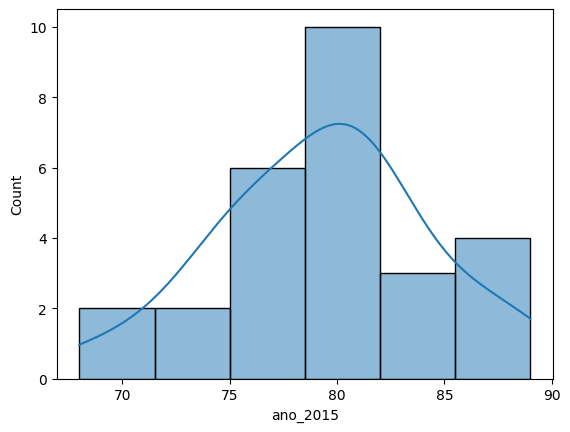

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=alunos, x='ano_2015', kde=True)
plt.show()







<Axes: xlabel='ano_2015', ylabel='Count'>

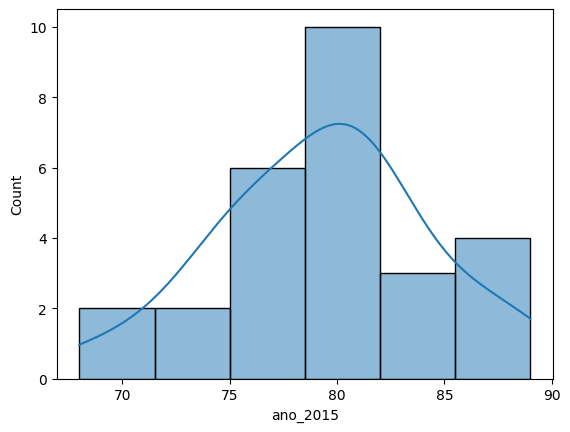

In [38]:
sns.histplot(alunos, x='ano_2015', kde=True)

<Axes: xlabel='ano_2016', ylabel='Count'>

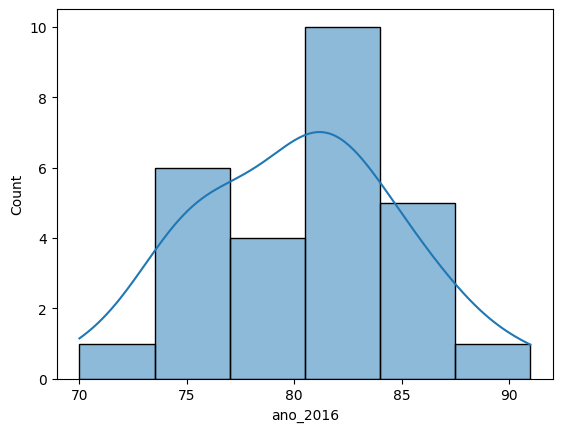

In [41]:
sns.histplot(alunos, x='ano_2016', kde=True)



<Axes: xlabel='ano_2015', ylabel='ano_2016'>

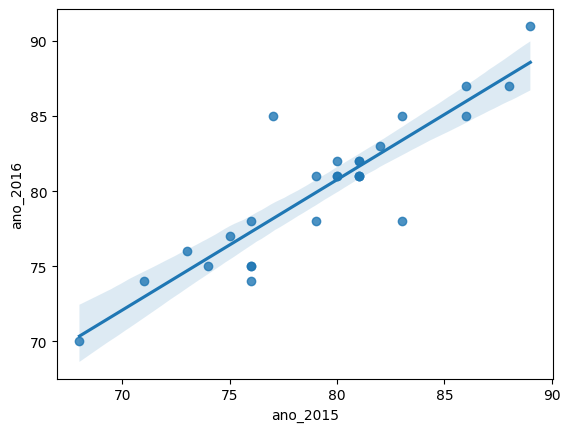

In [37]:
sns.regplot(x='ano_2015', y='ano_2016', data=alunos)


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
alunos_norm = pd.DataFrame(scaler.fit_transform(alunos), index=alunos.index, columns=alunos.columns)
alunos_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [43]:
alunos_norm.describe()


,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


<Axes: xlabel='ano_2015', ylabel='ano_2016'>

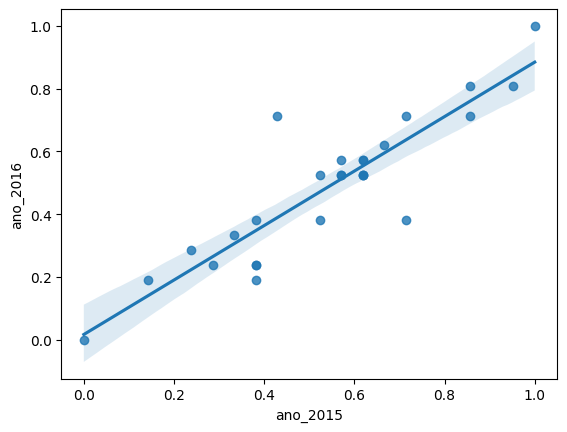

In [44]:
sns.regplot(x='ano_2015', y='ano_2016', data= alunos_norm)


In [45]:
import statsmodels.formula.api as smf
function = 'ano_2015 ~ ano_2016'

model = smf.ols(formula=function, data=alunos_norm)
result = model.fit()


print(result.summary())



                            OLS Regression Results                            
Dep. Variable:               ano_2015   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           3.02e-10
Time:                        18:46:47   Log-Likelihood:                 22.904
No. Observations:                  27   AIC:                            -41.81
Df Residuals:                      25   BIC:                            -39.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0922      0.049      1.874      0.0

In [46]:
x = alunos_norm[['ano_2015']]
y = alunos_norm[['ano_2016']]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)


lr = LinearRegression()


lr.fit(x_treino, y_treino)




LinearRegression()

In [51]:
r_sq = lr.score(x_treino, y_treino)
print(r_sq)

0.8800910056640281


In [54]:
y_pred_treino = lr.predict(x_treino)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_treino, y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_treino, y_pred_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))


MAE: 0.06313092719197842
MSE: 0.006947385853516443
RMSE: 0.08335097991935334


In [56]:
lr.fit(x_teste, y_teste)
y_pred_teste = lr.predict(x_teste)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred_teste))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred_teste))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.08998515473335626
MSE: 0.014620503143970094
RMSE: 0.08335097991935334
